In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px

In [56]:
try:
    df=sns.load_dataset('taxis')
    print('Dataset Loaded Successfully')
except:
    print('Dataset Not Found')

Dataset Loaded Successfully


In [57]:
df

pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West   
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  
0                  UN/Turtle Bay South      Manhattan       Manhattan  
1                Upper West Side South      Manhattan       Manhattan  
2                         West Village      Manhattan       Manhattan  
3                       Yorkville West      Manhattan       Manhattan  
4                       Yorkville West      Manhattan       Manhattan  
...                                ...            ...             ...  
6428              Central Harlem North      Manhattan       Manhattan  
6429  East Concourse/Concourse Village         Queens           Bronx  
6430                    Bushwick North       Brooklyn        Brooklyn  
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn  
6432                   Windsor Terrace       Brooklyn        Brooklyn  

[6433 rows x 14 columns]

In [58]:
df.isnull().sum().sort_values(ascending=False)

dropoff_zone       45
dropoff_borough    45
payment            44
pickup_zone        26
pickup_borough     26
pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
dtype: int64

In [59]:
df=df.drop(['pickup','dropoff'],axis=1)

In [60]:
df

passengers  distance  fare   tip  tolls  total   color      payment  \
0              1      1.60   7.0  2.15    0.0  12.95  yellow  credit card   
1              1      0.79   5.0  0.00    0.0   9.30  yellow         cash   
2              1      1.37   7.5  2.36    0.0  14.16  yellow  credit card   
3              1      7.70  27.0  6.15    0.0  36.95  yellow  credit card   
4              3      2.16   9.0  1.10    0.0  13.40  yellow  credit card   
...          ...       ...   ...   ...    ...    ...     ...          ...   
6428           1      0.75   4.5  1.06    0.0   6.36   green  credit card   
6429           1     18.74  58.0  0.00    0.0  58.80   green  credit card   
6430           1      4.14  16.0  0.00    0.0  17.30   green         cash   
6431           1      1.12   6.0  0.00    0.0   6.80   green  credit card   
6432           1      3.85  15.0  3.36    0.0  20.16   green  credit card   

                pickup_zone                      dropoff_zone pickup_borough  \
0           Lenox Hill West               UN/Turtle Bay South      Manhattan   
1     Upper West Side South             Upper West Side South      Manhattan   
2             Alphabet City                      West Village      Manhattan   
3                 Hudson Sq                    Yorkville West      Manhattan   
4              Midtown East                    Yorkville West      Manhattan   
...                     ...                               ...            ...   
6428      East Harlem North              Central Harlem North      Manhattan   
6429                Jamaica  East Concourse/Concourse Village         Queens   
6430    Crown Heights North                    Bushwick North       Brooklyn   
6431          East New York      East Flatbush/Remsen Village       Brooklyn   
6432            Boerum Hill                   Windsor Terrace       Brooklyn   

     dropoff_borough  
0          Manhattan  
1          Manhattan  
2          Manhattan  
3          Manhattan  
4          Manhattan  
...              ...  
6428       Manhattan  
6429           Bronx  
6430        Brooklyn  
6431        Brooklyn  
6432        Brooklyn  

[6433 rows x 12 columns]

In [61]:
df.dtypes

passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

In [62]:
fig_1=px.box(df,x='fare')
fig_1

In [63]:
fig_2=px.violin(df,x='distance')
fig_2

In [64]:
fig_3=px.area(df,x='tip')
fig_3

In [65]:
fig_4=px.violin(df,x='tolls')
fig_4

In [66]:
px.histogram(df,x='tip',y='passengers',histfunc='avg')

In [67]:
from sklearn.compose import ColumnTransformer,make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,RobustScaler
from sklearn.impute import KNNImputer,SimpleImputer,IterativeImputer

cat=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

num=Pipeline([
    ('imputer',IterativeImputer(max_iter=25,random_state=42)),
    ('scaler',RobustScaler())
])
preprocessor=ColumnTransformer([
    ('cats',cat,selector(dtype_include=['object','category'])),
    ('nums',num,selector(dtype_include=['number']))


])
preprocessor

ColumnTransformer(transformers=[('cats',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002BE4836E090>),
                                ('nums',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(max_iter=25,
                                                                   random_state=42)),
                                                 ('scaler', RobustScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002BE4836DD00>)])

In [ ]:
X=df.drop(['fare'],axis=1)
y=df['fare']

from lightgbm import LGBMRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=Pipeline([
    ('preprocessor',preprocessor),
    ('model',LGBMRegressor())
])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002BE4836E090>),
                                                 ('nums',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(max_iter=25,
                                                                                    random_state=42)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002BE4836DD00>)])),
                ('model', LGBMRegressor())])

In [84]:
param_grid={
    'model__n_estimators':[100,200,500],
    'model__max_depth':[2,3,5],
    'model__learning_rate':[0.1,0.2,0.3,0.5]

}

cv=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    verbose=1,
    cv=5,
    n_jobs=3

)
cv.fit(X_train,y_train)
y_pred=cv.predict(X_test)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 4116, number of used features: 128
[LightGBM] [Info] Start training from score 13.197733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [85]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print('Best CV Parametres',cv.best_params_)
print('MAE',mean_absolute_error(y_test,y_pred))
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))
print('RMSE',root_mean_squared_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))



Best CV Parametres {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 500}
MAE 0.6527849557680321
MAPE 0.05354875889497777
RMSE 1.9237127832864669
MSE 3.700670872579765


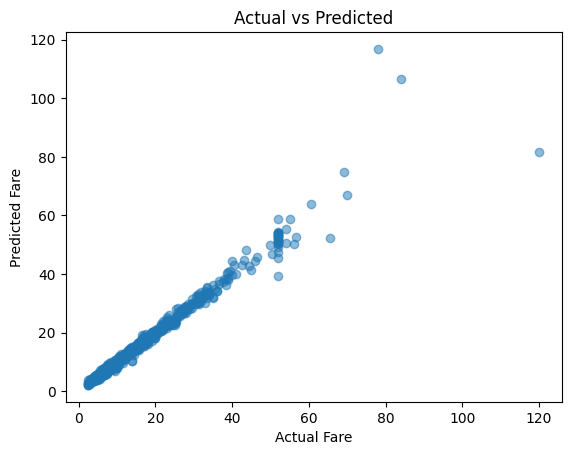

In [93]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted")
plt.show()

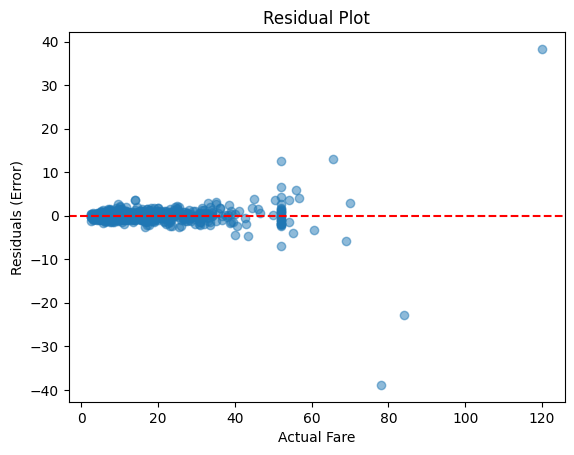

In [91]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Fare")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()

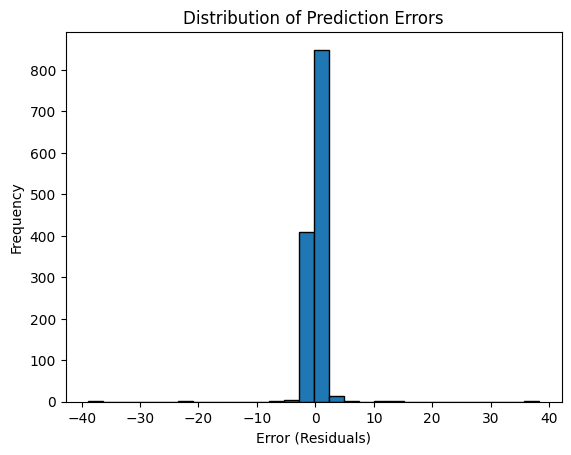

In [88]:
plt.hist(residuals, bins=30, edgecolor="black")
plt.xlabel("Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()